### Let Us See How Much Luck Really Influences Success

##### Lets first get the tools we need.

In [116]:
import numpy as np
import random
import matplotlib.pyplot as plt


##### Now Let Us Make a Function to Generate Scores

In [134]:
def generate_scores(num_scores, score_min, score_max, alpha, beta):
    beta_values = np.random.beta(alpha, beta, num_scores)
    scores = score_min + beta_values * (score_max - score_min)
    return scores

##### Now Here are all the knobs you can tweek to get your desired results

In [144]:
num_scores = 100_000
score_min = 0
score_max = 100
alpha = 2
beta = 2
luck_score = 5
top_n = 100


scores = generate_scores(num_scores, score_min, score_max, alpha, beta)

##### Run this cell to see the distribution of the scores. Else skip it.

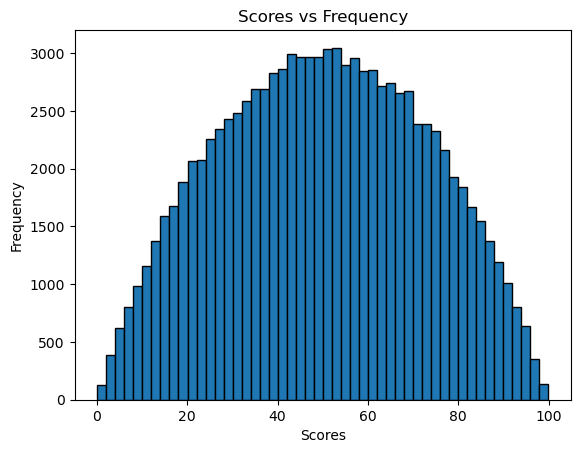

In [145]:
plt.hist(scores, bins=50, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Scores vs Frequency')
plt.show()

##### Now here is the crude internal logic. Im sure it can be made better but it gets the job done So...

In [146]:
# Ok now I will attach an ID with each score
x = []
for i in range(1,num_scores) :
    x.append([scores[i], i])


# Now I'll be sorting the list out :
x.sort(key=lambda item: item[0])

top_n_no_luck = x[-1:-1*top_n:-1]

# Now we will sprinkle in a bit of luck here and there

for i in x :
    luck = random.randint(0, luck_score)
    i[0] += luck

#Now we re-sort the list

x.sort(key=lambda item: item[0])

top_n_with_luck = x[-1:-1*top_n:-1]

common = 0
# Compare the lists and count the number of common elements
for i in top_n_no_luck :
    if i in top_n_with_luck :
        common += 1

print(f"Out of the {top_n} candidates, {common} still made it after the luck changes!")


Out of the 100 candidates, 48 still made it after the luck changes!
